In [346]:
#Includes necesarios
from sklearn.naive_bayes import CategoricalNB

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import train_test_split

from auxiliar import get_train_set,get_holdout_set,create_prediction
import preprocessing as pr

from auxiliar import plot_cm,plot_tree
from sklearn.metrics import classification_report,plot_roc_curve

# **Categorical Naive Bayes**

Obtenemos el dataset con el cual entrenaremos nuestro modelo. Para este modelo se opto unicamente tratar los missings como categoricos:

In [347]:
X,y = get_train_set()
X = pr.init_dataset(X)

Para aplicar este tipo de modelo debemos quedarnos solo con las columnas categoricas:

In [348]:
X_category = pr.select_types(X,types=['category'])
X_category.head()

,barrio,categoria_de_trabajo,estado_marital,genero,religion,rol_familiar_registrado,trabajo
0,palermo,empleado_provincial,sin_matrimonio,hombre,cristianismo,sin_familia,entretenimiento
1,palermo,monotributista,matrimonio_civil,hombre,cristianismo,casado,directivo_gerente
2,palermo,relacion_de_dependencia,divorciado,hombre,cristianismo,sin_familia,limpiador
3,palermo,relacion_de_dependencia,matrimonio_civil,hombre,judaismo,casado,limpiador
4,balvanera,relacion_de_dependencia,matrimonio_civil,mujer,judaismo,casada,profesional_especializado


Luego debemos aplicar ODE a las columnas debido a que CategoricalNB ....:

In [349]:
X_ode = pr.apply_ODE(X_category)

Partimos nuestro set en *train* y *validation*:

In [350]:
X_train, X_validation, y_train, y_validation = train_test_split(X_ode,y, test_size=0.2, stratify=y)

Busco los mejores hiperparametros para el arbol de decision con GridSearchCV. La metrica que se utiliza para comparar los modelos obtenidos en cada iteracion es *roc_auc_score*.

In [351]:
parameters = {
    'alpha': np.arange(0, 1,0.01),
}

clf = CategoricalNB()

gscv = GridSearchCV(
    clf, parameters, scoring='roc_auc',n_jobs=-1, cv=5, return_train_score=True
).fit(X_train, y_train)

print(f"Best score: {gscv.best_score_}")
print(f"Best params {gscv.best_params_}")
print("------------------")
print(f"Score in Validation: {gscv.score(X_validation, y_validation)}")

Best score: 0.8473949842249129
Best params {'alpha': 0.5700000000000001}
------------------
Score in Validation: 0.851017441860465


In [352]:
model_categoricalNB = gscv.best_estimator_
model_categoricalNB

CategoricalNB(alpha=0.5700000000000001)

Predigo con el validation set:

In [353]:
categoricalNB_predict = model_categoricalNB.predict(X_validation)

**Metricas**

In [354]:
print(classification_report(y_validation, categoricalNB_predict))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      4945
           1       0.50      0.77      0.61      1568

    accuracy                           0.76      6513
   macro avg       0.71      0.76      0.72      6513
weighted avg       0.81      0.76      0.78      6513



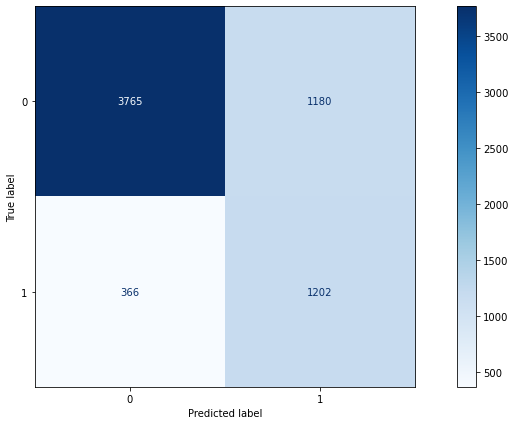

In [355]:
plot_cm(model_categoricalNB, X_validation, y_validation)

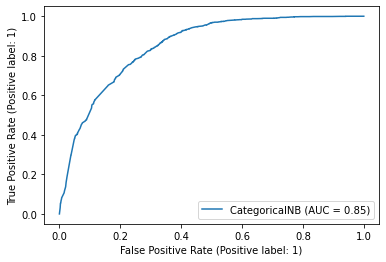

In [356]:
plot_roc_curve(model_categoricalNB, X_validation, y_validation, response_method="predict_proba")
plt.show()

### Preprocesamiento: Reduccion de columnas

Ahora vemos que sucede si reduciremos algunas columnas y luego aplicaremos ODE a las columnas categoricas. Al realizar esta primera reduccion de columnas obtendremos asi una reduccion dimensional. Reduciremos mediante la funcion **reduce_by_frequency_occurrence** que por predeterminado tiene las columnas *Barrio, Religion, Categoria de Trabajo, Estado Marital*:

In [357]:
X_p1 = pr.reduce_by_frequency_occurrence(X_category)
X_p1.head()

,barrio,categoria_de_trabajo,estado_marital,genero,religion,rol_familiar_registrado,trabajo
0,palermo,otra,sin_matrimonio,hombre,cristianismo,sin_familia,entretenimiento
1,palermo,otra,matrimonio_civil,hombre,cristianismo,casado,directivo_gerente
2,palermo,relacion_de_dependencia,otro,hombre,cristianismo,sin_familia,limpiador
3,palermo,relacion_de_dependencia,matrimonio_civil,hombre,judaismo,casado,limpiador
4,otro,relacion_de_dependencia,matrimonio_civil,mujer,judaismo,casada,profesional_especializado


Luego debemos aplicar ODE como se menciono anteriormente:

In [358]:
X_ode_p1 = pr.apply_ODE(X_p1)

Partimos nuestro set en *train* y *validation*:

In [359]:
X_train, X_validation, y_train, y_validation = train_test_split(X_ode_p1,y, test_size=0.2, stratify=y)

Busco los mejores hiperparametros para el arbol de decision con GridSearchCV. La metrica que se utiliza para comparar los modelos obtenidos en cada iteracion es *roc_auc_score*.

In [360]:
parameters = {
    'alpha': np.arange(0, 1,0.01),
}

clf = CategoricalNB()

gscv = GridSearchCV(
    clf, parameters, scoring='roc_auc',n_jobs=-1, cv=5, return_train_score=True
).fit(X_train, y_train)

print(f"Best score: {gscv.best_score_}")
print(f"Best params {gscv.best_params_}")
print("------------------")
print(f"Score in Validation: {gscv.score(X_validation, y_validation)}")

Best score: 0.8443245721236581
Best params {'alpha': 0.72}
------------------
Score in Validation: 0.848002968882194


In [361]:
model_categoricalNB_p1 = gscv.best_estimator_
model_categoricalNB_p1

CategoricalNB(alpha=0.72)

Predigo con el validation set:

In [362]:
categoricalNB_predict = model_categoricalNB_p1.predict(X_validation)

**Metricas**

In [363]:
print(classification_report(y_validation, categoricalNB_predict))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      4945
           1       0.49      0.78      0.60      1568

    accuracy                           0.75      6513
   macro avg       0.70      0.76      0.71      6513
weighted avg       0.81      0.75      0.77      6513



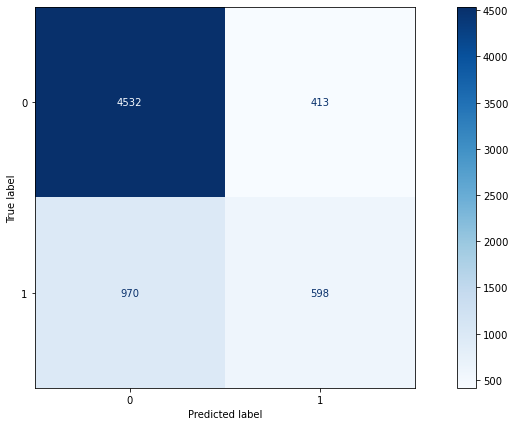

In [364]:
plot_cm(model_categoricalNB, X_validation, y_validation)

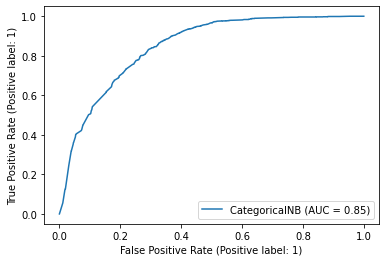

In [365]:
plot_roc_curve(model_categoricalNB_p1, X_validation, y_validation, response_method="predict_proba")
plt.show()

# Conclusión

Vimos que utilizando CategoricalNB tenemos una mejora pero no tan significativa, aun asi si aplicamos un preproceso de reduccion.

# Predicción

In [366]:
ids, X_holdout = get_holdout_set()
X_holdout = pr.init_dataset(X_holdout)

In [367]:
X_holdout_category = pr.select_types(X_holdout,types=['category'])
X_holdout_ode = pr.apply_ODE(X_holdout_category)

In [368]:
categoricalNB_predict = model_categoricalNB.predict(X_holdout_ode)

In [369]:
create_prediction(ids,categoricalNB_predict,file_name='categoricalNB')